# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from plotly.subplots import make_subplots
from IPython.display import SVG, display
import plotly.io as pio

import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Wholesale customers data.csv')

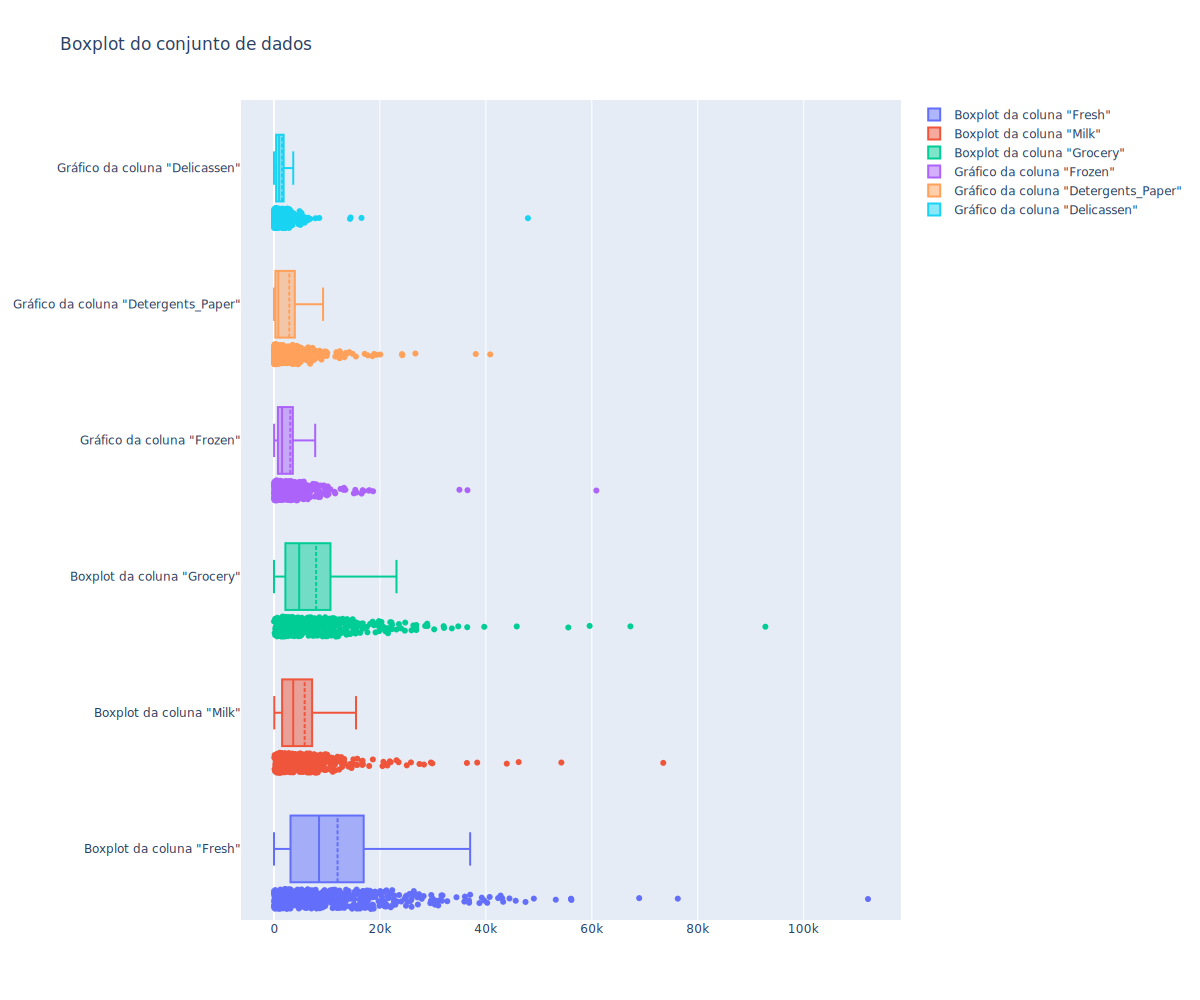

In [3]:
fig = go.Figure()
fig.add_trace(
    go.Box(
            x=df['Fresh'], boxpoints='all', 
            name = 'Boxplot da coluna "Fresh"',boxmean=True, jitter= 0.3,
          )
        )


fig.add_trace(
    go.Box(
            x=df['Milk'], boxpoints='all', 
            name = 'Boxplot da coluna "Milk"',boxmean=True, jitter= 0.3,
          )
    )


fig.add_trace(
    go.Box(
            x=df['Grocery'], boxpoints='all', 
            name = 'Boxplot da coluna "Grocery"',boxmean=True, jitter= 0.3,
           )
    )


fig.add_trace(
    go.Box(
            x=df['Frozen'], boxpoints='all', 
            name = 'Gráfico da coluna "Frozen"',boxmean=True, jitter= 0.3,
           )
    )


fig.add_trace(
    go.Box(
            x=df['Detergents_Paper'], boxpoints='all', 
            name = 'Gráfico da coluna "Detergents_Paper"',boxmean=True, jitter= 0.3,
           )
    )


fig.add_trace(
    go.Box(
            x=df['Delicassen'], boxpoints='all', 
            name = 'Gráfico da coluna "Delicassen"',boxmean=True, jitter= 0.3,
           )
    )


fig.update_traces(orientation='h')
fig.update_layout(height=1000, width=1200, title_text="Boxplot do conjunto de dados")
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

In [4]:
df1 = df.drop([81,25,84,86,47,85,83,61,23,333,65,325,183,93,71,87,168]) # retirada dos outliers e criação de um dataframe diferente para não alterar o dataframe inicial
df1.reset_index(drop=True, inplace=True) 
X = df1
X_std = StandardScaler().fit_transform(X)
WCSS = []
K = range(2,11) #utilizou-se o inicio igual a 2, pois uma cluster apenas é considerado o conjunto completo.
for k in K:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

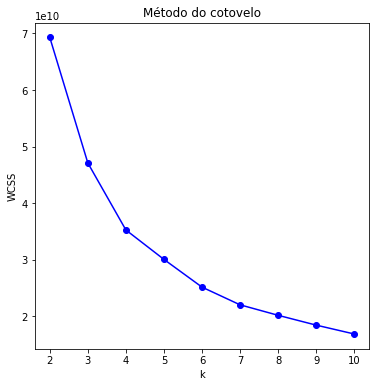

In [5]:
plt.figure(figsize = (6,6))
plt.plot(K,WCSS,'-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Método do cotovelo')
plt.show()

<div>
<p><strong>&emsp;&emsp;&emsp;&emsp;O gráfico de cotovelo tem o objetivo de buscar os pontos que estão mais diagonais que os outros, pontos mais horizontais e verticais não são interessantes para a análise,todavia, as vezes o gráfico de cotovelo pode mais atrapalhar do que ajudar</strong></p>
</div>

Construa um modelo de **clusterização K-Médias** usando o melhor numero de clusters informado pelo gráfico de cotovelo e usem o parametro **random_state** com valor 10.

<strong> Existem dois códigos de determinação de clusters, o primeiro código está localizado logo abaixo desta célula, ele separa os clusters de acordo com a melhor métrica silhouette e o segundo que separa três clusters, este que separa em três cluster estará no apêndice do trabalho.</strong>

In [6]:
silh_met = []
for i in K:
  kmean = KMeans(n_clusters= i)
  kmean_pred = kmean.fit_predict(X) 
  print(f'Para k igual a {i}:')
  silh_kmean = silhouette_score(X, kmean_pred, metric = 'euclidean')
  silh_met.append(silh_kmean)
  print(f'Métrica silhouette para kmean é de: {silh_kmean:.03f}')  
km = KMeans(n_clusters=(np.argmax(silh_met)+2), random_state=10) #np.argmax puxa o index do máximo valor de uma np.array
km.fit(X_std)
y_pred = km.predict(X_std)

c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Para k igual a 2:
Métrica silhouette para kmean é de: 0.466


c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Para k igual a 3:
Métrica silhouette para kmean é de: 0.415


c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Para k igual a 4:
Métrica silhouette para kmean é de: 0.391


c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Para k igual a 5:
Métrica silhouette para kmean é de: 0.348


c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Para k igual a 6:
Métrica silhouette para kmean é de: 0.338


c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Para k igual a 7:
Métrica silhouette para kmean é de: 0.321


c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Para k igual a 8:
Métrica silhouette para kmean é de: 0.319


c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Para k igual a 9:
Métrica silhouette para kmean é de: 0.302


c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Para k igual a 10:
Métrica silhouette para kmean é de: 0.273


c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Adicione o resultado da clusterização no conjunto de dados original, chame essa nova variavel de **cluster** e conte quantas observações há em cada cluster e preencha:

In [7]:
df1['cluster'] = y_pred
df1.value_counts(['cluster'])

cluster
0          293
1          130
dtype: int64

In [8]:
df1.value_counts(['Channel'])

Channel
1          291
2          132
dtype: int64

In [9]:
print('Total de observações do cluster 1: {}'.format(int(np.int_((df1.loc[df1['cluster'] == 0, 'cluster'].value_counts())))))
print('Total de observações do cluster 2: {}'.format(int(np.int_((df1.loc[df1['cluster'] == 1, 'cluster'].value_counts())))))

Total de observações do cluster 1: 293
Total de observações do cluster 2: 130


Escolha dois clusters e separe os dados em dois subconjuntos, chamando-os de clusterA e clusterB.

In [10]:
clusterA = df1
clusterB = df1

for i in range(len(df1.index.values)):
    if clusterA.loc[i,'cluster'] != 0 :
        clusterA = clusterA.drop([i], axis = 0)
    if clusterB.loc[i,'cluster'] != 1 :
        clusterB = clusterB.drop([i], axis = 0)

In [11]:
clusterA.describe().round(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.0
mean,1.031,2.498,13194.710,2991.881,3617.232,3317.635,707.990,1109.580,0.0
std,0.173,0.809,12598.198,2750.265,2778.269,3691.035,863.945,1059.932,0.0
min,1.000,1.000,3.000,55.000,3.000,47.000,3.000,3.000,0.0
25%,1.000,2.000,4042.000,1124.000,1694.000,825.000,184.000,378.000,0.0
50%,1.000,3.000,9602.000,2102.000,2707.000,1960.000,386.000,790.000,0.0
75%,1.000,3.000,18073.000,3836.000,4945.000,4479.000,850.000,1450.000,0.0
max,2.000,3.000,76237.000,18664.000,16966.000,18711.000,4762.000,6854.000,0.0


In [12]:
clusterB.describe().round(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.0
mean,1.946,2.600,8171.077,10073.392,15146.846,1628.777,6602.738,1751.838,1.0
std,0.227,0.722,11510.090,5943.015,7238.987,1984.030,3998.293,1626.769,0.0
min,1.000,1.000,18.000,1275.000,4602.000,25.000,282.000,3.000,1.0
25%,2.000,2.000,2182.750,6243.500,9836.750,551.750,3895.500,618.000,1.0
50%,2.000,3.000,5253.500,8445.500,13100.500,1104.500,5890.000,1409.500,1.0
75%,2.000,3.000,11209.750,12162.750,19718.750,2146.750,7997.000,2165.500,1.0
max,2.000,3.000,112151.000,29892.000,39694.000,16745.000,19410.000,8550.000,1.0


In [13]:
#Criação de dicionários para montagem para um dataframe para melhor visualização dos dados

clusterA_met = {'FreshA':[clusterA['Fresh'].max(),clusterA['Fresh'].mean(),clusterA['Fresh'].min()],'MilkA':[clusterA['Milk'].max(),clusterA['Milk'].mean(),clusterA['Milk'].min()],'GroceryA':[clusterA['Grocery'].max(),clusterA['Grocery'].mean(),clusterA['Grocery'].min()],'FrozenA':[clusterA['Frozen'].max(),clusterA['Frozen'].mean(),clusterA['Frozen'].min()],'Detergents_PaperA':[clusterA['Detergents_Paper'].max(),clusterA['Detergents_Paper'].mean(),clusterA['Detergents_Paper'].min()],'DelicassenA':[clusterA['Delicassen'].max(),clusterA['Delicassen'].mean(),clusterA['Delicassen'].min()]}

clusterB_met = {'FreshB':[clusterB['Fresh'].max(),clusterB['Fresh'].mean(),clusterB['Fresh'].min()],'MilkB':[clusterB['Milk'].max(),clusterB['Milk'].mean(),clusterB['Milk'].min()],'GroceryB':[clusterB['Grocery'].max(),clusterB['Grocery'].mean(),clusterB['Grocery'].min()],'FrozenB':[clusterB['Frozen'].max(),clusterB['Frozen'].mean(),clusterB['Frozen'].min()],'Detergents_PaperB':[clusterB['Detergents_Paper'].max(),clusterB['Detergents_Paper'].mean(),clusterB['Detergents_Paper'].min()],'DelicassenB':[clusterB['Delicassen'].max(),clusterB['Delicassen'].mean(),clusterB['Delicassen'].min()]}

In [14]:
#Montagem do dataframe para visualização dos dados do maxímo, média e mínimo

clusterA_met = pd.DataFrame(clusterA_met, columns= ['FreshA','MilkA','GroceryA','FrozenA','Detergents_PaperA','DelicassenA'], index = ['MAXÍMO','MÉDIA','MÍNIMO'])
clusterB_met = pd.DataFrame(clusterB_met, columns= ['FreshB','MilkB','GroceryB','FrozenB','Detergents_PaperB','DelicassenB'], index = ['MAXÍMO','MÉDIA','MÍNIMO'])

cluster_AB_met = pd.concat([clusterA_met,clusterB_met], axis = 1, sort = True).round(3)
cluster_AB_met.columns = cluster_AB_met.columns.sort_values(ascending=True)
cluster_AB_met.T

,MAXÍMO,MÉDIA,MÍNIMO
DelicassenA,76237.0,13194.710,3.0
DelicassenB,18664.0,2991.881,55.0
Detergents_PaperA,16966.0,3617.232,3.0
Detergents_PaperB,18711.0,3317.635,47.0
FreshA,4762.0,707.990,3.0
FreshB,6854.0,1109.580,3.0
FrozenA,112151.0,8171.077,18.0
FrozenB,29892.0,10073.392,1275.0
GroceryA,39694.0,15146.846,4602.0
GroceryB,16745.0,1628.777,25.0


<div>
<p>&emsp;&emsp;&emsp;&emsp;<strong>Pelo dataframe gerado acima para melhor visualização, é possível perceber que há vários valores de máximos e mínimos que são diferentes, então sim, essas métricas são diferentes para os clusters</strong></p>
</div>

Sendo dois agrupamentos distintos, qual rotulo poderiamos utilizar para identifica-los? Justifique a sua resposta

<div>
<p>&emsp;&emsp;&emsp;&emsp;<strong>O único rótulo do dataset que possui dois rótulos é <em>Channel</em>,que foi a coluna que mais se assemelhou com a clusterização, todavia quando acontece a retirada do rótulo citado, ele tenta classificar o dataset através do <em>Region</em> mesmo com k sendo igual a 2, ou seja é possível se concluir que é possível agrupar com k igual à 3, também, tudo vai depender da necessidade do cliente</strong></p>
</div>

Responda, quais são as vantagens e desvantagens do algoritmo K-Médias?

<div>
<strong>
<h1>Vantagens</h1>
<ul>
<li>Bom custo computacional</li>
<li>Boa precisão</li>
<li>Facil implementação</li>
<li>Rápido para conjunto de dados extensos</li>
<li>Generaliza clusters de diversas formas e tamanhos não muito variados</li>
</ul>

<h1>Desvantagens</h1>
<ul>
<li>Sensível a outliers</li>
<li>Escolher manualmente valores de K</li>
<li>Problema de escolher clusters de formas e tamanhos muito variados</li>
</ul>
</strong>

</div>


<div><p>&emsp;&emsp;&emsp;&emsp;<strong>Sim, afeta.</strong></p>
<p>&emsp;&emsp;&emsp;&emsp;<strong>O posicionamento do centroide deve ser feito com muito cuidado, uma vez que seja posicionado centroides muito proximos, isso pode causar um problema na divisão dos clusters, pois já que os centroides são recalculados e reposicionados, pode existir dois centroides que podem atingir o mesmo resultado, caso estejam muito proximos, fazendo com que exista um cluster com os mesmos resultados de outro.</strong></p> 
</div>

# Inicio do código, sendo k=3, a explicação da utilização do k=3 está no final do código

In [15]:
df2 = df.drop([81,25,84,86,47,85,83,61,23,333,65,325,183,93,71,87,168])
df2.reset_index(drop=True,inplace=True)
X = df2.drop(['Channel'], axis = 1)
X_std = StandardScaler().fit_transform(X)

In [16]:
km = KMeans(n_clusters=3, random_state=10) #np.argmax puxa o index do máximo valor de uma np.array
km.fit(X_std)
y_pred = km.predict(X_std)

c:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [17]:
df2['cluster'] = y_pred
df2.value_counts(['cluster'])

cluster
1          275
0           86
2           62
dtype: int64

In [18]:
df2.value_counts(['Region'])

Region
3         301
1          77
2          45
dtype: int64

In [19]:
print('Total de observações do cluster 1: {}'.format(int(np.int_((df2.loc[df2['cluster'] == 1, 'cluster'].value_counts())))))
print('Total de observações do cluster 2: {}'.format(int(np.int_((df2.loc[df2['cluster'] == 0, 'cluster'].value_counts())))))
print('Total de observações do cluster 2: {}'.format(int(np.int_((df2.loc[df2['cluster'] == 2, 'cluster'].value_counts())))))

Total de observações do cluster 1: 275
Total de observações do cluster 2: 86
Total de observações do cluster 2: 62


In [20]:
clusterA = df2.copy()
clusterB = df2.copy()
clusterC = df2.copy()

for i in range(len(df2.index.values)):
    if clusterA.loc[i,'cluster'] != 0 :
        clusterA = clusterA.drop([i], axis = 0)
    if clusterB.loc[i,'cluster'] != 1 :
        clusterB = clusterB.drop([i], axis = 0)
    if clusterC.loc[i,'cluster'] != 2 :
        clusterC = clusterC.drop([i], axis = 0)

In [21]:
clusterA_met = {'FreshA':[clusterA['Fresh'].max(),clusterA['Fresh'].mean(),clusterA['Fresh'].min()],'MilkA':[clusterA['Milk'].max(),clusterA['Milk'].mean(),clusterA['Milk'].min()],'GroceryA':[clusterA['Grocery'].max(),clusterA['Grocery'].mean(),clusterA['Grocery'].min()],'FrozenA':[clusterA['Frozen'].max(),clusterA['Frozen'].mean(),clusterA['Frozen'].min()],'Detergents_PaperA':[clusterA['Detergents_Paper'].max(),clusterA['Detergents_Paper'].mean(),clusterA['Detergents_Paper'].min()],'DelicassenA':[clusterA['Delicassen'].max(),clusterA['Delicassen'].mean(),clusterA['Delicassen'].min()]}

clusterB_met = {'FreshB':[clusterB['Fresh'].max(),clusterB['Fresh'].mean(),clusterB['Fresh'].min()],'MilkB':[clusterB['Milk'].max(),clusterB['Milk'].mean(),clusterB['Milk'].min()],'GroceryB':[clusterB['Grocery'].max(),clusterB['Grocery'].mean(),clusterB['Grocery'].min()],'FrozenB':[clusterB['Frozen'].max(),clusterB['Frozen'].mean(),clusterB['Frozen'].min()],'Detergents_PaperB':[clusterB['Detergents_Paper'].max(),clusterB['Detergents_Paper'].mean(),clusterB['Detergents_Paper'].min()],'DelicassenB':[clusterB['Delicassen'].max(),clusterB['Delicassen'].mean(),clusterB['Delicassen'].min()]}

clusterC_met = {'FreshC':[clusterC['Fresh'].max(),clusterC['Fresh'].mean(),clusterC['Fresh'].min()],'MilkC':[clusterC['Milk'].max(),clusterC['Milk'].mean(),clusterC['Milk'].min()],'GroceryC':[clusterC['Grocery'].max(),clusterC['Grocery'].mean(),clusterC['Grocery'].min()],'FrozenC':[clusterC['Frozen'].max(),clusterC['Frozen'].mean(),clusterC['Frozen'].min()],'Detergents_PaperC':[clusterC['Detergents_Paper'].max(),clusterC['Detergents_Paper'].mean(),clusterC['Detergents_Paper'].min()],'DelicassenC':[clusterC['Delicassen'].max(),clusterC['Delicassen'].mean(),clusterC['Delicassen'].min()]}

In [22]:
clusterA_met = pd.DataFrame(clusterA_met, columns= ['FreshA','MilkA','GroceryA','FrozenA','Detergents_PaperA','DelicassenA'], index = ['MAXÍMO','MÉDIA','MÍNIMO'])
clusterB_met = pd.DataFrame(clusterB_met, columns= ['FreshB','MilkB','GroceryB','FrozenB','Detergents_PaperB','DelicassenB'], index = ['MAXÍMO','MÉDIA','MÍNIMO'])
clusterC_met = pd.DataFrame(clusterC_met, columns= ['FreshC','MilkC','GroceryC','FrozenC','Detergents_PaperC','DelicassenC'], index = ['MAXÍMO','MÉDIA','MÍNIMO'])
cluster_ABC_met = pd.concat([clusterA_met,clusterB_met,clusterC_met], axis = 1, sort = True).round(3)
cluster_ABC_met.columns = cluster_ABC_met.columns.sort_values(ascending=True)
cluster_ABC_met.T

,MAXÍMO,MÉDIA,MÍNIMO
DelicassenA,31714.0,5769.919,18.0
DelicassenB,29892.0,11610.256,1275.0
DelicassenC,39694.0,18202.500,8852.0
Detergents_PaperA,6746.0,1456.581,25.0
Detergents_PaperB,19410.0,8231.651,282.0
Detergents_PaperC,6372.0,1675.965,3.0
FreshA,43088.0,10114.989,3.0
FreshB,13252.0,3080.509,55.0
FreshC,16966.0,4114.302,3.0
FrozenA,9735.0,1946.884,47.0


<h1>Justificativa</h1>
<div>
<p>&emsp;&emsp;&emsp;&emsp;A justificativa para a utilização do k=3 se iniciou na utilização da métrica do silhouette quando a métrica de k = 3 se assemelhou bastante com a métrica do k=2, com isso, analisando os dados apresentados, é possível verificar que os dados são rotulados, pois existem 2 colunas que rotulam os dados, sendo elas: <em>Channel</em> e <em>Region</em>, uma que classifica a origem do cliente(1- café/restaurante/hotel e 2 - varejo) e outro que classifica a localização do cliente (1 - lisboa,2 -  porto ou 3 - outra região), sendo assim, mesmo o método da silhouette determinando que o melhor coeficiente seja k = 2, construiu-se um modelo que determina clusters com k = 3 e os resultados obtidos acima foram satisfatórios.</p>
<p>&emsp;&emsp;&emsp;&emsp;O modelo errou 52 pontos e acertou 371 pontos, acertando 87.7%, então, sim utilizando o cluster k=3 é possível de montar um modelo que obtem um ótimo resultado classificando a coluna <em>Region</em></p>
</div>